L'objectif de cette partie est d'analyser le comportement de la marche aléatoire d'une molécule 
de colorant dans un liquide (par exemple de l'eau) en utilisant différents modèles d'évolution de sa position $dx = x(t+dt)-x(t)$, résultant de collisions avec les molécules d'eau environnantes.

## Challenge 1

'Etant donnée l'équation stochastique

\begin{equation}
dx=cdt+\sqrt{2\alpha dt}N(0,1),
\end{equation}
                             
où $c$ est une constante, $\alpha$ le coefficient de diffusion, analyser le comportement de la marche aléatoire, ainsi que l'équation de diffusiuon
gouvernant l'évolution de la densité $\rho$ des molécules. Trouver la solution analytique de 
cette équation avec une distribution gaussienne comme condition initiale.

Résolution:

In [3]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16

Nous intégrons à présent l'équation stochastique ci-dessus:

In [35]:
T=10.0 # temps total de la simulation
nt=500 # nombre de pas de temps
dt=T/nt # intervalle de temps dt
alpha=2.0 # coefficient de diffusion 
c=3 #on fice la constante c à 3

# position des particules et conditions initiales
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Intégration sur t
for i in range(nt):
    x[i+1]=x[i] + c*dt + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

Représentons la solution graphiquement:

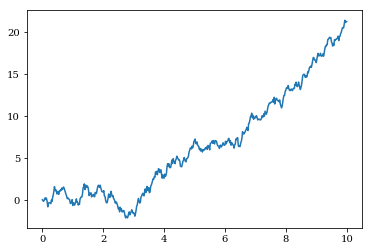

In [39]:
pyplot.plot(t,x)

Pour l'équation (constante $c$ non inclue):

\begin{equation}
ds=\sqrt{2\alpha dt}N(0,1)
\end{equation}

donnée comme exemple au début de la lesson, on observe qu'à chaque fois qu'on effectue l'intégration, nous obtenons une évolution de $x$ en fonction de $t$ très aléatoire (voir les deux images ci-dessous):

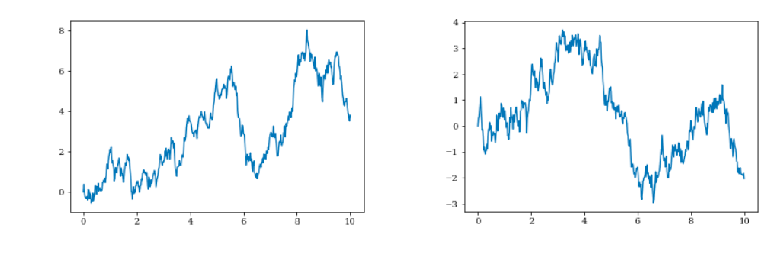

In [1]:
from matplotlib import pyplot
import numpy
%matplotlib inline
from matplotlib import rcParams
rcParams['font.family'] = 'serif'
rcParams['font.size'] = 16
from IPython.display import Image
from pylab import imshow,hist,subplot,figure, imread, title

f = pyplot.figure(figsize=(13,13))
image1=pyplot.imread('Im1.png');
image2=pyplot.imread('Im2.png');
f.add_subplot(121);
pyplot.axis('off')
imshow(image1);
subplot(122);
pyplot.axis('off');
imshow(image2);

Au contraire, avec l'ajout de $c$, le comportement se linéarise et lorsque $c>> \alpha$, le graphe obtenu est une droite de pente $c$. Nous interprétons cela comme une molécule qui s'éloigne constamment de sa position d'équilibre avec une vitesse constante $c$.

L'équation de diffusion déduite de l'équation stochastique ci-dessus est la suivante:
    
$$
\frac{\partial \rho}{\partial t}=\left( \frac{2\alpha + c}{2}\right) \frac{\partial^2 \rho}{\partial x^2},
$$

et en utilisant la condition initiale 

$$
P(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{(x-\mu)^2}{2\sigma^2}},
$$ 

la solution analytique de l' équation de diffusion est donnée par 

$$
\rho(x,t)=\frac{1}{\sqrt{2\pi\sigma_t^2}}e^{-\frac{(x-\mu)^2}{2\sigma_t^2}}
$$

avec $\sigma^2_t = (2\alpha +c) t + \sigma^2$.

Traçons l'histogramme des positions des molécules, et vérifions que nous obtenons une gaussienne.

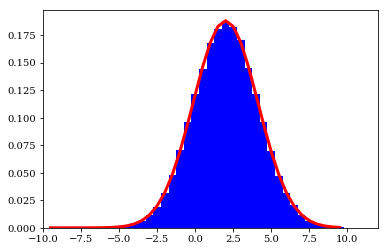

In [95]:
npart=100000 # on initialise le nombre total de particules
T=0.5
alpha=2.0 # coefficient de diffusion 
c=3 #on fixe la constante c à 3
sigma = 1.0
sigmat=((2*alpha+c)*T)+(sigma**2)
mu = 2 # on choisit une moyenne arbitraire

x0 = numpy.random.normal(loc=mu,scale=numpy.sqrt(sigmat),size=npart)

# On génère des bins centrés en 0
binwidth=0.5
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2


# Calcul des centres des bins
bin_centers = bins[:-1]+binwidth/2


# On trace l'histogramme et la distribution attendue
pyplot.xlim(-10,12)
pyplot.hist(x0,bins,density=True, color='blue');
pyplot.plot(bin_centers, numpy.exp(-(bin_centers-mu)**2/(2.0*sigmat))/numpy.sqrt(2*numpy.pi*sigmat),color='red', linewidth=3)

Nous obtenons la distribution gaussienne (en bleu) et le graphe de $\rho$ (rouge) attendus.

## Challenge 2

'Etant donnée l'équation stochastique

\begin{equation}
dx=-\gamma x dt + \sqrt{2\alpha dt}N(0,1),
\end{equation}
                             
où $\gamma$ est un terme de friction, analyser le comportement de la marche aléatoire et vérifier que la distribution atteint un état stable pour $t\rightarrow \infty$. Déduire l'équation d'évolution de la densité $\rho$ des molécules. Trouver la solution analytique de cette équation dans le cas d'un état stable.

Résolution:

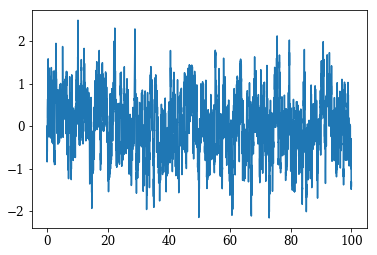

In [73]:
T=100 # temps total de la simulation
nt=8000  # nombre de pas de temps
dt=T/nt # intervalle de temps dt
alpha=2.0 # coefficient de diffusion 
gamma=5 # terme de friction

# position des particules et conditions initiales
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Intégration sur t
for i in range(nt):
    x[i+1]=x[i]*(1-gamma*dt) + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

pyplot.plot(t,x)

Nous observons cette fois-ci beaucoup de fluctuations dues au terme de friction $\gamma$ ajouté dans l'équation stochastique. Les molécules se déplacent autour de leur position initiale et elles y restent "piégées" à cause de ce terme de friction qui les empêche de s'en éloigner.

Afin d'obtenir l'équation de diffusion sur base de l'équation stochastique ci-dessus, nous utilisons l'équation
de Langevin [1]:
    
$$
dx=f(x(t),t)dt + g(x(t),t)\sqrt{dt}N(0,1),
$$

où $f$ et $g$ sont des fonctions quelconques.
L'équation générale pour la diffusion est alors:

$$
\frac{\partial \rho}{\partial t}=-\frac{\partial}{\partial x}\left( f(x,t)\rho(x,t)\right) + 
\frac{\partial²}{\partial x²}\left( \frac{g(x,t)²\rho(x,t)}{2} \right).
$$

Dans notre cas, $g = \sqrt{2 \alpha}$ et $f = - \gamma x(t)$, et donc l'équation de diffusion devient

$$
\frac{\partial \rho}{\partial t}=-\frac{\partial}{\partial x}\left(  - \gamma x(t)\rho(x,t)\right) + 
\alpha \frac{\partial²}{\partial x²}\left( \rho(x,t) \right).
$$

Dans le cas où $\gamma$ est nul, nous retrouvons la première équation de diffusion présentée dans la lesson de "Monte Carlo, Brownian Motion".

Une solution stable est une solution telle que $\frac{\partial \rho}{\partial t}=0$. Cela implique que

$$
\frac{d}{dx}\left( \gamma x\rho(x) + \alpha \frac{d \rho(x)}{dx}\right) = 0.
$$

Nous obtenons donc:

$$
\gamma x\rho(x) + \alpha \frac{d \rho(x)}{dx} = cste.
$$

Or, comme cette densité $\rho$ ainsi que sa dérivée $\frac{d \rho(x)}{dx}$ doivent décroître rapidement vers 0 à l'infini, le membre de gauche de l'équation ci-dessus devient donc nul à l'infini. Puisque ce membre est égal à une constante, la seule solution possible est que cette constante est nulle [2].

Nous pouvons donc directement résoudre l'équation différentielle, ce qui nous donne une gaussienne de moyenne nulle
et et de variance $\alpha / \gamma$:

$$
\rho(x) = A e^{-\frac{\gamma}{2 \alpha}x²},
$$

où A est une constante d'intégration.


Vérifions à présent que la distribution atteint un état stable lorsque $t\rightarrow \infty$. Pour cela, nous utilisons le code ci-dessous en augmentant T (de 0.01 à 31000) et observons l'évolution de l'histogramme. Par exemple, pour T = 100, cela donne:

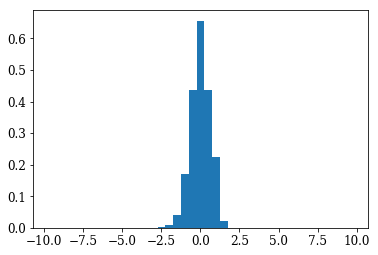

In [66]:
T=20 # temps total de la simulation
nt=8000  # nombre de pas de temps
dt=T/nt # intervalle de temps dt
alpha=2.0 # coefficient de diffusion 
gamma=5 # terme de friction

# position des particules et conditions initiales
t = numpy.arange(0,T+dt,dt)
x = numpy.empty(nt+1)
x[0]=0

# Intégration sur t
for i in range(nt):
    x[i+1]=x[i]*(1-gamma*dt) + numpy.sqrt(2*alpha*dt)*numpy.random.normal(0,1)

b=[]
for i in range(1,nt):
    b.append(x[i])

# on génère des bins
binwidth=0.5
bins=numpy.arange(-10,10,binwidth)
bins = bins + binwidth/2

# on définit les centres des bins
bin_centers = bins[:-1]+binwidth/2

# on trace l'histogramme
pyplot.hist(b,bins,density=True);

Voici les résultats obtenus pour T allant de 0.01 à 31000:

<Figure size 1440x1440 with 0 Axes>

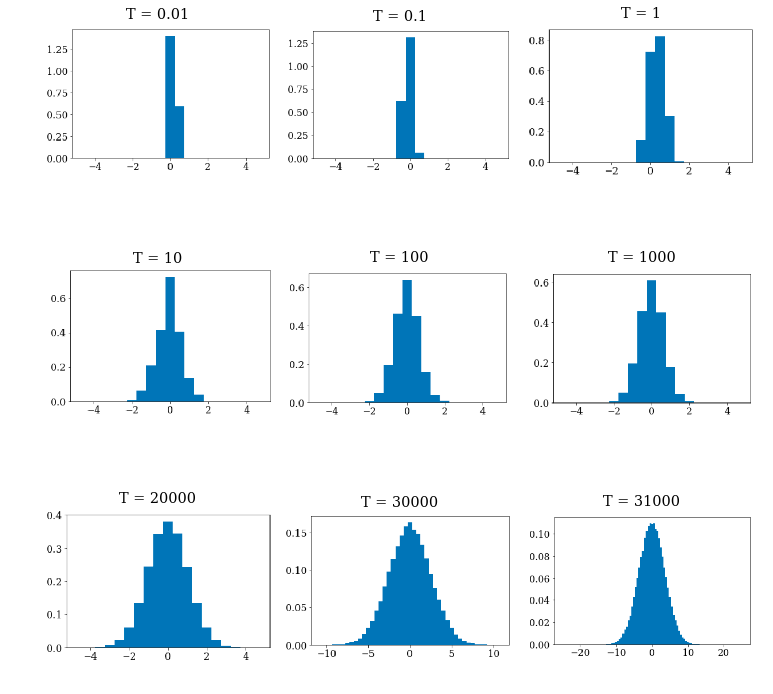

In [74]:
rcParams['font.size'] = 12
f = pyplot.figure(figsize=(20,20))
f.subplots_adjust(hspace=0.1, wspace=0)
image1, image2, image3= pyplot.imread('0,01.png'), pyplot.imread('0,1.png'), pyplot.imread('1.png')
image4, image5, image6 = pyplot.imread('10.png'), pyplot.imread('100.png'), pyplot.imread('1000.png')
image7, image8, image9 = pyplot.imread('20_000.png'), pyplot.imread('30_000.png'), pyplot.imread('31_000.png')

# On définit une fonction qui place les images de manière ordonnée
def plot_images(np_images, titles = [0.01,0.1,1,10,100,1000,20000,30000,31000], columns = 3, figure_size = (13, 13)):
    count = [1,2,3,4,5,6,7,8,9]
    rows = 3

    fig = plt.figure(figsize=figure_size)
    fig.subplots_adjust(hspace=0.1, wspace=0)
    subplots = []
    for i in (count):
        subplots.append(fig.add_subplot(rows, columns, i))
        pyplot.axis('off')
        if len(titles):
            subplots[-1].set_title('T = '+ str(titles[i-1]))
        imshow(np_images[i-1])
    plt.show()
    
plot_images([image1,image2,image3,image4,image5,image6,image7,image8,image9])

Nous constatons que l'état stationnaire (T très grand) atteint par notre distribution est une gaussienne de moyenne nulle, ce qui confirme le calcul effectué précédemment.

Références:

[1]  https://www2.ph.ed.ac.uk/~dmarendu/ASP/Section15.pdf 

[2]  https://www2.ph.ed.ac.uk/~dmarendu/ASP/Section16.pdf